In [ ]:
!pip install bs4
!pip install requests
!pip install pandas

In [ ]:
url = 'https://www.worldometers.info/coronavirus/'

In [ ]:
import os

In [ ]:
import requests

response = requests.get(url)
response

<Response [200]>

b'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n\n\n\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n\n    <title>COVID - Coronavirus Statistics - Worldometer</title>\n    <meta name="description" content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates.">\n\n\n    \n\t<!-- Favicon -->\n\t<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n\t<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n\t<link rel="apple-touch-icon" sizes="60x60" href="/favicon/apple-icon-60x60.png">\n\t<link rel="apple-touch-icon" sizes="72x72" href="/favicon/apple-icon-72x72.png">\n\t<li
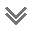

In [ ]:
print(response.content)

In [ ]:
from bs4 import BeautifulSoup

# bs4 is library and BeautifulSoup is a module,
# we are import BeautifulSoup module from bs4 library
# library typically consists of set of mod

soup = BeautifulSoup(response.content, 'html.parser')
print(soup.prettify()[:5000])

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID - Coronavirus Statistics - Worldometer
  </title>
  <meta content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates." name="description"/>
  <!-- Favicon -->
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
  <link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
  <link href="/favicon/apple-icon-76x

In [ ]:
# find gives first tbody
world_data = soup.find("tbody").find_all('tr')
# len(clinics) # should return 20 in this case

In [ ]:
for data in world_data:
  print(data)
  break

<tr class="total_row_world row_continent" data-continent="North America" style="display: none">
<td></td>
<td style="text-align:left;">
<nobr>North America</nobr>
</td>
<td>126,972,855</td>
<td></td>
<td>1,637,179</td>
<td></td>
<td>122,943,535</td>
<td>+625</td>
<td>2,392,141</td>
<td>5,952</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td data-continent="North America" style="display:none;">North America</td>
<!-- 1 Case every X -->
<td>
</td>
<!-- 1 Death every X -->
<td></td>
<!-- 1 test every X -->
<td></td>
<td></td>
<td></td>
<td></td>
</tr>


In [ ]:
a = lambda x: print(x)

print(a(2))

2
None


In [ ]:
complete_data = []
for i in range(8, len(world_data)):
  data = []
  list_data = world_data[i].find_all("td")
  for i in list_data:
    data.append(i.text)
  complete_data.append(data)
  # world_data[7].find_all('td')

In [ ]:
mapped_data = list(map(lambda x: x[1:10] + [x[12]] + [x[14]], complete_data))

In [ ]:
sample_list = [1, 2]
for item in map(lambda x: x**2, sample_list):
  print(item)

1
4


In [ ]:
column_names = [
    "Names",
    "Total Cases",
    "New Cases",
    "Total Deaths",
    "New Deaths",
    "Total Recovered",
    "New Recovered",
    "Active Cases",
    "Serious Cases",
    "Total tests",
    "Population"
]

**CSV module**
- CSV stands for comma separated value.
- In python we have dedicated CSV module that makes working with csv file easier.
- We use csv module to write and read csv files

In [ ]:
import pandas as pd

df = pd.DataFrame(mapped_data, columns = column_names)
df.to_csv('covid_data.csv', index=False)

In [ ]:
# read csv
df = pd.read_csv('covid_data.csv')
df.head()

,Names,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious Cases,Total tests,Population
0,USA,"107,303,873",NaN,"1,168,100",NaN,"105,446,987",NaN,"688,786",786.0,"1,180,755,685","334,805,269"
1,India,"44,994,144",NaN,"531,905",NaN,"44,460,690",NaN,"1,549",NaN,"930,797,975","1,406,631,776"
2,France,"40,136,348",NaN,"167,642",NaN,"39,940,169",NaN,"28,537",869.0,"271,490,188","65,584,518"
3,Germany,"38,428,685",NaN,"174,352",NaN,"38,240,600",NaN,"13,733",NaN,"122,332,384","83,883,596"
4,Brazil,"37,671,420",NaN,"703,964",NaN,"36,249,161",NaN,"718,295",NaN,"63,776,166","215,353,593"


## Data Processing
- Visualize missing data

In [ ]:
# inspecting missing data
df.isnull().sum()

Names                0
Total Cases          0
New Cases          220
Total Deaths         0
New Deaths         228
Total Recovered     22
New Recovered      213
Active Cases        20
Serious Cases      107
Total tests         18
Population           0
dtype: int64

In [ ]:
# plot the missing data
df.isnull()

,Names,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious Cases,Total tests,Population
0,False,False,True,False,True,False,True,False,False,False,False
1,False,False,True,False,True,False,True,False,True,False,False
2,False,False,True,False,True,False,True,False,False,False,False
3,False,False,True,False,True,False,True,False,True,False,False
4,False,False,True,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
226,False,False,True,False,True,False,True,False,True,True,False
227,False,False,True,False,True,False,True,False,True,True,False
228,False,False,True,False,True,False,True,False,True,True,False
229,False,False,True,False,True,True,True,False,True,True,False


In [ ]:
missing_data = df.isnull().sum()
missing_data

Names                0
Total Cases          0
New Cases          220
Total Deaths         0
New Deaths         228
Total Recovered     22
New Recovered      213
Active Cases        20
Serious Cases      107
Total tests         18
Population           0
dtype: int64

<Axes: >

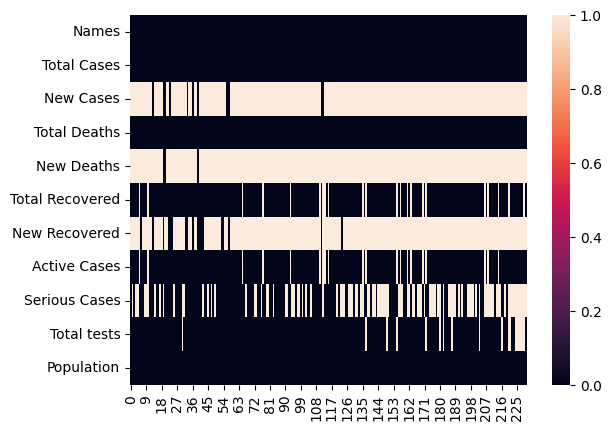

In [ ]:
# import seaborn
import seaborn as sns
import matplotlib.pyplot as plt # import pyplot module from matplotlib, pyplot module is a sub-module within `matplotlib`

sns.heatmap(df.isnull().T)

- we see lots of missing data in New cases, New Deaths, New Recovered columns
- In part of data preprocessing we can remove those columns

In [ ]:
df.head()

,Names,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious Cases,Total tests,Population
0,USA,"107,303,873",NaN,"1,168,100",NaN,"105,446,987",NaN,"688,786",786.0,"1,180,755,685","334,805,269"
1,India,"44,994,144",NaN,"531,905",NaN,"44,460,690",NaN,"1,549",NaN,"930,797,975","1,406,631,776"
2,France,"40,136,348",NaN,"167,642",NaN,"39,940,169",NaN,"28,537",869.0,"271,490,188","65,584,518"
3,Germany,"38,428,685",NaN,"174,352",NaN,"38,240,600",NaN,"13,733",NaN,"122,332,384","83,883,596"
4,Brazil,"37,671,420",NaN,"703,964",NaN,"36,249,161",NaN,"718,295",NaN,"63,776,166","215,353,593"


AttributeError: ignored

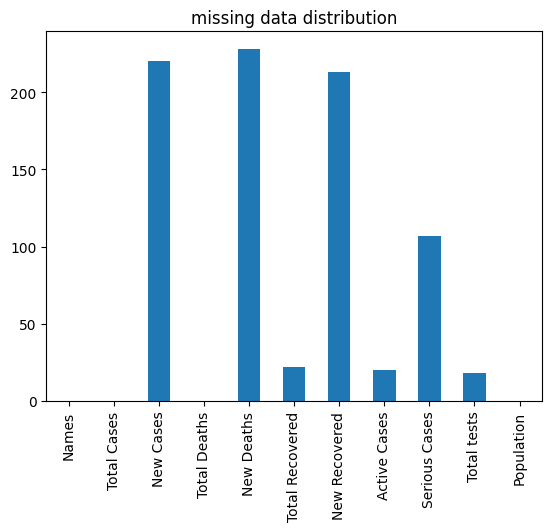

In [ ]:
# plot bar graph
missing_data.plot(kind='bar')
plt.title('missing data distribution')
plt.ylablel('missing count')

Text(0.5, 0, 'missing count')

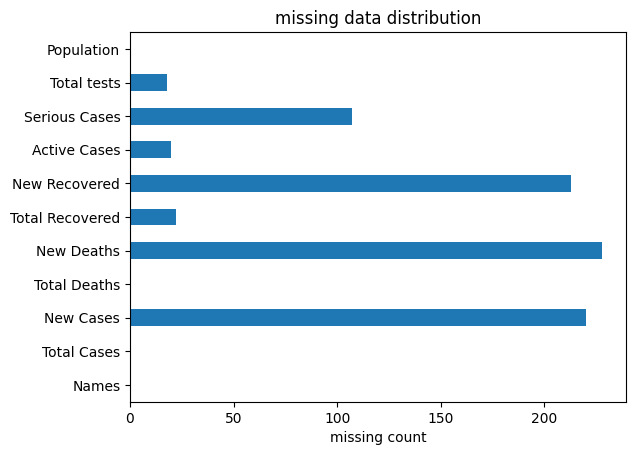

In [ ]:
# plot horizontal bar graph
missing_data.plot(kind='barh')
plt.title('missing data distribution')
plt.xlabel('missing count')

In [ ]:
# get index of missing data

missing_data.index

Index(['Names', 'Total Cases', 'New Cases', 'Total Deaths', 'New Deaths',
       'Total Recovered', 'New Recovered', 'Active Cases', 'Serious Cases',
       'Total tests', 'Population'],
      dtype='object')

In [ ]:
# get values of missing data

missing_data.values

array([  0,   0, 220,   0, 228,  22, 213,  20, 107,  18,   0])

In [ ]:
# Interactive plot using plotly
import plotly.express as px

px.bar(x = missing_data.index, y = missing_data.values)

In [ ]:
# plot pie chart
labels = missing_data.index
sizes = missing_data.values

px.pie(values = missing_data.values, names = missing_data.index, title = 'Missing data In percentage')

In [ ]:
# Check data type
df.dtypes

Names               object
Total Cases         object
New Cases          float64
Total Deaths        object
New Deaths         float64
Total Recovered     object
New Recovered       object
Active Cases        object
Serious Cases      float64
Total tests         object
Population          object
dtype: object

Total Deaths is object type, we need to convert it into numbers


In [ ]:
int('23')

23

In [ ]:
# change data type
df['Total Cases'] = df['Total Cases'].map(lambda x: int(x.replace(",", "")))
df.dtypes

Names               object
Total Cases          int64
New Cases          float64
Total Deaths        object
New Deaths         float64
Total Recovered     object
New Recovered       object
Active Cases        object
Serious Cases      float64
Total tests         object
Population          object
dtype: object

**Total cases by country**

In [ ]:
df_cases_country = df[['Names', 'Total Cases']]
df_cases_country.head()

,Names,Total Cases
0,USA,107303873
1,India,44994144
2,France,40136348
3,Germany,38428685
4,Brazil,37671420


In [ ]:
# sort by descending order
df_cases_country = df_cases_country.sort_values(by='Total Cases', ascending=False)
df_cases_country.head()

,Names,Total Cases
0,USA,107303873
1,India,44994144
2,France,40136348
3,Germany,38428685
4,Brazil,37671420


In [ ]:
# plot 5 country with high total cases
df_cases_country = df_cases_country.head()
df_cases_country.head()

,Names,Total Cases
0,USA,107303873
1,India,44994144
2,France,40136348
3,Germany,38428685
4,Brazil,37671420


In [ ]:
# set name as index

df_cases_country = df_cases_country.set_index('Names')
df_cases_country

,Total Cases
Names,
USA,107303873
India,44994144
France,40136348
Germany,38428685
Brazil,37671420


<Axes: xlabel='Names'>

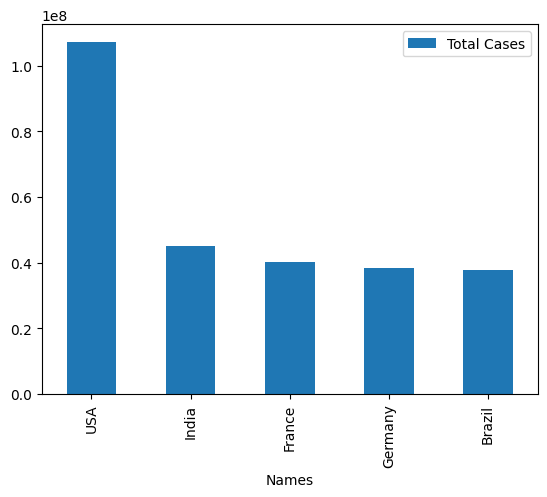

In [ ]:
## plot bar graph
df_cases_country.plot(kind='bar')

In [ ]:
df_cases_country.values

array([[107303873],
       [ 44994144],
       [ 40136348],
       [ 38428685],
       [ 37671420]])

In [ ]:
# plot using plotly

px.bar(x = df_cases_country.index, y = df_cases_country['Total Cases'].values)

In [ ]:
db_save = df[['Names', 'Total Cases', 'Total Deaths', 'Total Recovered', 'Total tests']].head(20).dropna()
db_save

,Names,Total Cases,Total Deaths,Total Recovered,Total tests
0,USA,"107,283,941","1,167,832","105,436,062","1,180,732,558"
1,India,"44,993,999","531,903","44,460,441","930,797,975"
2,France,"40,133,520","167,616","39,934,830","271,490,188"
3,Germany,"38,428,685","174,352","38,240,600","122,332,384"
4,Brazil,"37,655,917","703,719","36,249,161","63,776,166"
6,S. Korea,"32,131,606","35,017","31,830,890","15,804,065"
7,Italy,"25,893,101","190,782","25,587,953","273,454,631"
8,UK,"24,618,436","226,278","24,392,158","522,526,476"
9,Russia,"22,953,409","399,436","22,395,145","273,400,000"
11,Spain,"13,905,048","121,622","13,740,203","471,036,328"


## SQLite setup

In [ ]:
db_save

Names               object
Total Cases         object
New Cases          float64
Total Deaths        object
New Deaths         float64
Total Recovered     object
New Recovered      float64
Active Cases        object
Serious Cases      float64
Total tests         object
Population          object
dtype: object

In [ ]:
db_save.dropna()

,Names,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious Cases,Total tests,Population


In [ ]:
import sqlite3

db_name = 'covid.db'
conn = sqlite3.connect(db_name)
print("Database created and connection is setup!!")

Database created and connection is setup!!


In [ ]:
column_names = [
    "Names",
    "Total Cases",
    "New Cases",
    "Total Deaths",
    "New Deaths",
    "Total Recovered",
    "New Recovered",
    "Active Cases",
    "Serious Cases",
    "Total tests",
    "Population"
]

In [ ]:
# create database table

conn.execute(""" CREATE TABLE covid_stats
            (
             ID             INT           PRIMARY KEY           NOT NULL,
             NAMES          VARCHAR(50)                         NOT NULL,
             TOTALCASES     VARCHAR(50)                        NOT NULL,
             TOTALDEATHS     VARCHAR(50),
             TOTALRECOVERED  VARCHAR(50),
             TOTALTESTS      VARCHAR(50)
            )
             """)

In [ ]:
for idx, row in db_save.iterrows():
  names = row['Names']
  total_cases = row['Total Cases']
  total_deaths = row['Total Deaths']
  total_recovered = row['Total Recovered']
  total_tests = row['Total tests']

  try:
    conn.execute(f""" INSERT INTO
            covid_stats (ID, NAMES, TOTALCASES, TOTALDEATHS, TOTALRECOVERED, TOTALTESTS) VALUES ('{idx}', '{names}', '{total_cases}', '{total_deaths}', '{total_recovered}', '{total_tests}')
    """)

  except Exception as e:
    print(f'{row} already inserted')

  else:
    conn.commit()

In [ ]:
# Insertion operations

In [ ]:
# inspect the missing data
df.isnull().sum()

Names                0
Total Cases          0
New Cases          230
Total Deaths         0
New Deaths         231
Total Recovered     22
New Recovered      225
Active Cases        20
Serious Cases      108
Total tests         18
Population           0
dtype: int64

In [ ]:
complete_data[0]

['1',
 'USA',
 '107,283,941',
 '',
 '1,167,832                                ',
 '',
 '105,436,062',
 '',
 '680,047',
 '787',
 '320,437',
 '3,488',
 '1,180,732,558',
 '3,526,625',
 '334,805,269 ',
 'North America',
 '3',
 '287',
 '0',
 '',
 '',
 '2,031']

In [ ]:
complete_data[0][1:8]

['USA',
 '107,283,941',
 '',
 '1,167,832                                ',
 '',
 '105,436,062',
 '']

In [ ]:
complete_data[0][12]

'1,180,732,558'

In [ ]:
complete_data[0][14]

'334,805,269 '

In [ ]:
square = lambda x: x**2

<function __main__.<lambda>(x)>

In [ ]:
square(2)

4